<a href="https://colab.research.google.com/github/GurGaZik/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
url = "https://drive.google.com/uc?export=download&id=130uKatSQ7Tpm4cAED2Q5H5C8WQSdDm8R"
input_df = pd.read_excel(url, header = 0) 
input_df.head()

,"Wind, m/s"
0,15.18
1,15.84
2,16.60
3,14.98
4,13.28


In [ ]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,"Wind, m/s"
715,4.94
716,2.84
717,2.56
718,2.18
719,1.80


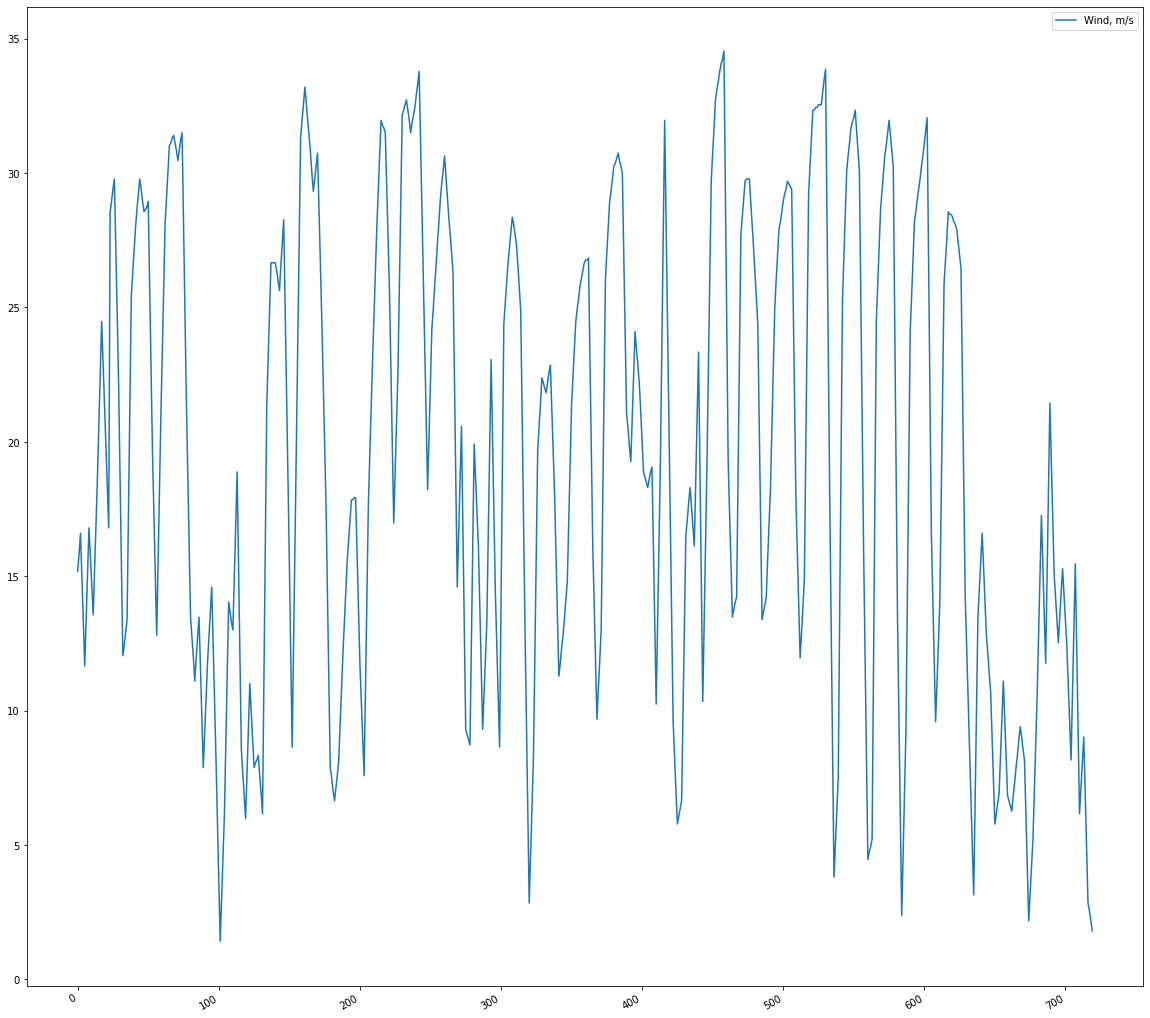

In [ ]:
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

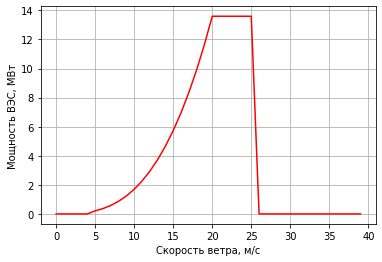

In [ ]:
# График зависимости выроботки ВЭС от скорости ветра 
def wind_speed_to_power(speed):
  min_speed = 5
  max_speed = 20
  critical_speed = 25
  speed_tmp = np.where(np.logical_or(speed > critical_speed, speed < min_speed), 0, speed) 
  speed_tmp = np.clip(speed_tmp, a_min = None, a_max = max_speed)
  power = 0.0017 * (speed_tmp) ** 3
  
  return power
x = np.arange(0, 40, 1)
fig, ax = plt.subplots()
ax.plot(x, wind_speed_to_power(x), color='red')
ax.grid(True)
ax.set_xlabel('Скорость ветра, м/с') 
ax.set_ylabel('Мощность ВЭC, МВт')
plt.show()

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()
p = figure(plot_width = 800, plot_height = 400)
p.line(np.arange(len(x)),wind_speed_to_power(x), line_width = 3)
show(p)

In [78]:
# График мощности по времени
wind_power = wind_speed_to_power(input_df.values)
output_notebook()
p = figure(plot_width = 800, plot_height = 400)
p.line(np.arange(len(wind_power)), wind_power.flatten(), line_width = 3)
show(p)

In [102]:
#График среднесуточной выработки ВЭС.

input_matrix = input_df.values



for i in range(0, 30):
 a.append(wind_power[i * 24 : (i + 1) * 24].mean())
p = figure(plot_width = 800, plot_height = 400)
del a[31:]
p.line(np.arange(len(a)), a, line_width = 3, color = 'purple')
show(p)

np.arange(len(a))